## Grid refinement study for the flow around an obstacle

In [1]:
import lettuce as lt
from matplotlib import pyplot as plt

In [2]:
def run(ny=100, *axes):
    
    lattice = lt.Lattice(lt.D2Q9, "cuda", use_native=False)
    flow = lt.Obstacle(
        (2*ny, ny),
        reynolds_number=50.0,
        mach_number=0.05,
        lattice=lattice,
        domain_length_x=10.1,
    )
    x, y = flow.grid
    flow.mask = ((x >= 2) & (x < 3) &  (y >= x) & (y <= 3))
    axes[0].imshow(flow.mask.T, origin="lower")
    
    tau = flow.units.relaxation_parameter_lu 
    sim = lt.Simulation(flow, lattice, lt.BGKCollision(lattice, tau), 
                        lt.StandardStreaming(lattice))
    sim.step(ny * 100)
    u = flow.units.convert_velocity_to_pu(lattice.u(sim.f).detach().cpu().numpy())
    print("Max Velocity:", u.max())
    return axes[1].imshow(u[0,...].T, origin="lower")

In [3]:
def run_and_plot(n):
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    fig.subplots_adjust(right=0.85)
    im2 = run(n, *axes)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im2, cax=cbar_ax)

Max Velocity: 1.5470362


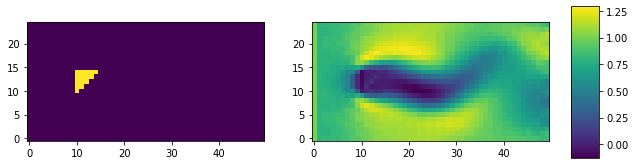

In [4]:
run_and_plot(25)

Max Velocity: 1.5507787


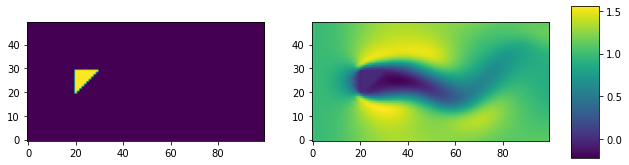

In [5]:
run_and_plot(50)

Max Velocity: 1.5609822


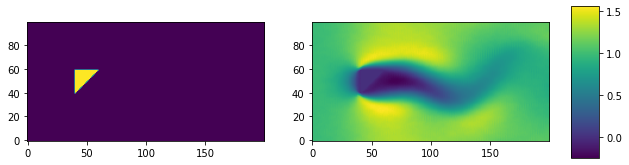

In [6]:
run_and_plot(100)